<a href="https://colab.research.google.com/github/helloitsdaksh/Minor-Project/blob/main/Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np
import tensorflow as tf

In [2]:
!nvidia-smi

Tue Sep 20 12:14:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Import Data 

In [3]:
!ls drive/MyDrive/Projected_impacts_datasheet_11.24.2021.xlsx

drive/MyDrive/Projected_impacts_datasheet_11.24.2021.xlsx


In [4]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [5]:
df = pd.read_excel("Projected_impacts_datasheet_11.24.2021.xlsx")

In [6]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

##Walk Through the Data

In [7]:
df.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T,...,Climate impacts (%),Climate impacts relative to 2005,Climate impacts per dC (%),Climate impacts per decade (%),CO2 ppm,Publication year,Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period)
count,8703.00000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8703.000000,8702.000000,4392.000000,...,8703.000000,8703.000000,8703.000000,8703.000000,8538.000000,8703.000000,386.000000,1917.000000,366.000000,189.000000
mean,4352.00000,25.185816,32.340434,17.804514,17.252870,974.121895,962.207224,2055.435482,1986.571248,2.095515,...,-7.837566,-6.976058,-5.030708,-1.576233,514.895029,2014.038837,50.695555,862.841427,4.425903,668.146545
std,2512.48403,22.770279,69.821017,7.111171,8.282561,538.116430,693.195670,22.553559,13.148001,1.207587,...,24.807447,21.519675,17.988020,5.253247,114.081462,5.256125,157.213514,577.562989,7.624984,397.076905
min,1.00000,-38.416100,-122.000000,-8.371055,-8.371055,0.967242,0.967242,2000.000000,1965.000000,0.180000,...,-100.000000,-100.000000,-158.227848,-40.777778,330.000000,1984.000000,-335.800000,42.700000,-22.463600,154.000000
25%,2176.50000,14.058300,2.213750,11.848694,11.119357,605.289909,421.181280,2030.000000,1975.000000,1.127000,...,-17.634600,-13.103754,-7.704895,-2.678499,431.450000,2014.000000,-6.396000,467.000000,0.600000,381.000000
50%,4352.00000,32.403950,34.888800,17.663128,17.087790,907.985051,839.157841,2055.000000,1975.000000,1.807000,...,-4.592310,-2.782084,-1.944647,-0.701507,486.535320,2014.000000,4.195100,675.000000,4.790000,525.316500
75%,6527.50000,40.339900,90.356300,24.380180,24.863827,1264.254206,1254.342238,2080.000000,2002.000000,2.800000,...,5.025218,3.324415,2.181967,0.743806,550.500000,2017.000000,53.153200,1314.000000,7.000000,815.000000
max,8703.00000,61.924110,151.750000,30.500914,30.500914,3248.452253,3891.503190,2110.000000,2016.000000,6.600000,...,186.873000,135.907636,153.710247,26.153333,935.874370,2020.000000,791.000000,3300.000000,25.333333,1803.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 52 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                8703 non-null   float64
 1   Ref No                                                            4 non-null      object 
 2    Methods                                                          8703 non-null   object 
 3   Scale                                                             8703 non-null   object 
 4   Crop                                                              8703 non-null   object 
 5   Country                                                           8703 non-null   object 
 6   Site(location)                                                    2694 non-null   object 
 7   Region                           

In [9]:
clean_data = df.drop(df.columns[41:], axis=1)

In [10]:
clean_data = clean_data.drop(clean_data.columns[[6,19,21]],axis = 1)

In [11]:
clean_data.isna().sum()

ID                                                         0
Ref No                                                  8699
 Methods                                                   0
Scale                                                      0
Crop                                                       0
Country                                                    0
Region                                                     0
latitude                                                  37
longitude                                                 37
Current Average Temperature (dC)_area_weighted            37
Current Average Temperature_point_coordinate (dC)         37
Current Annual Precipitation (mm) _area_weighted          37
Current Annual Precipitation  (mm) _point_coordinate      37
Future_Mid-point                                           0
Baseline_Mid-point                                         1
Time slice                                                 0
Climate scenario        

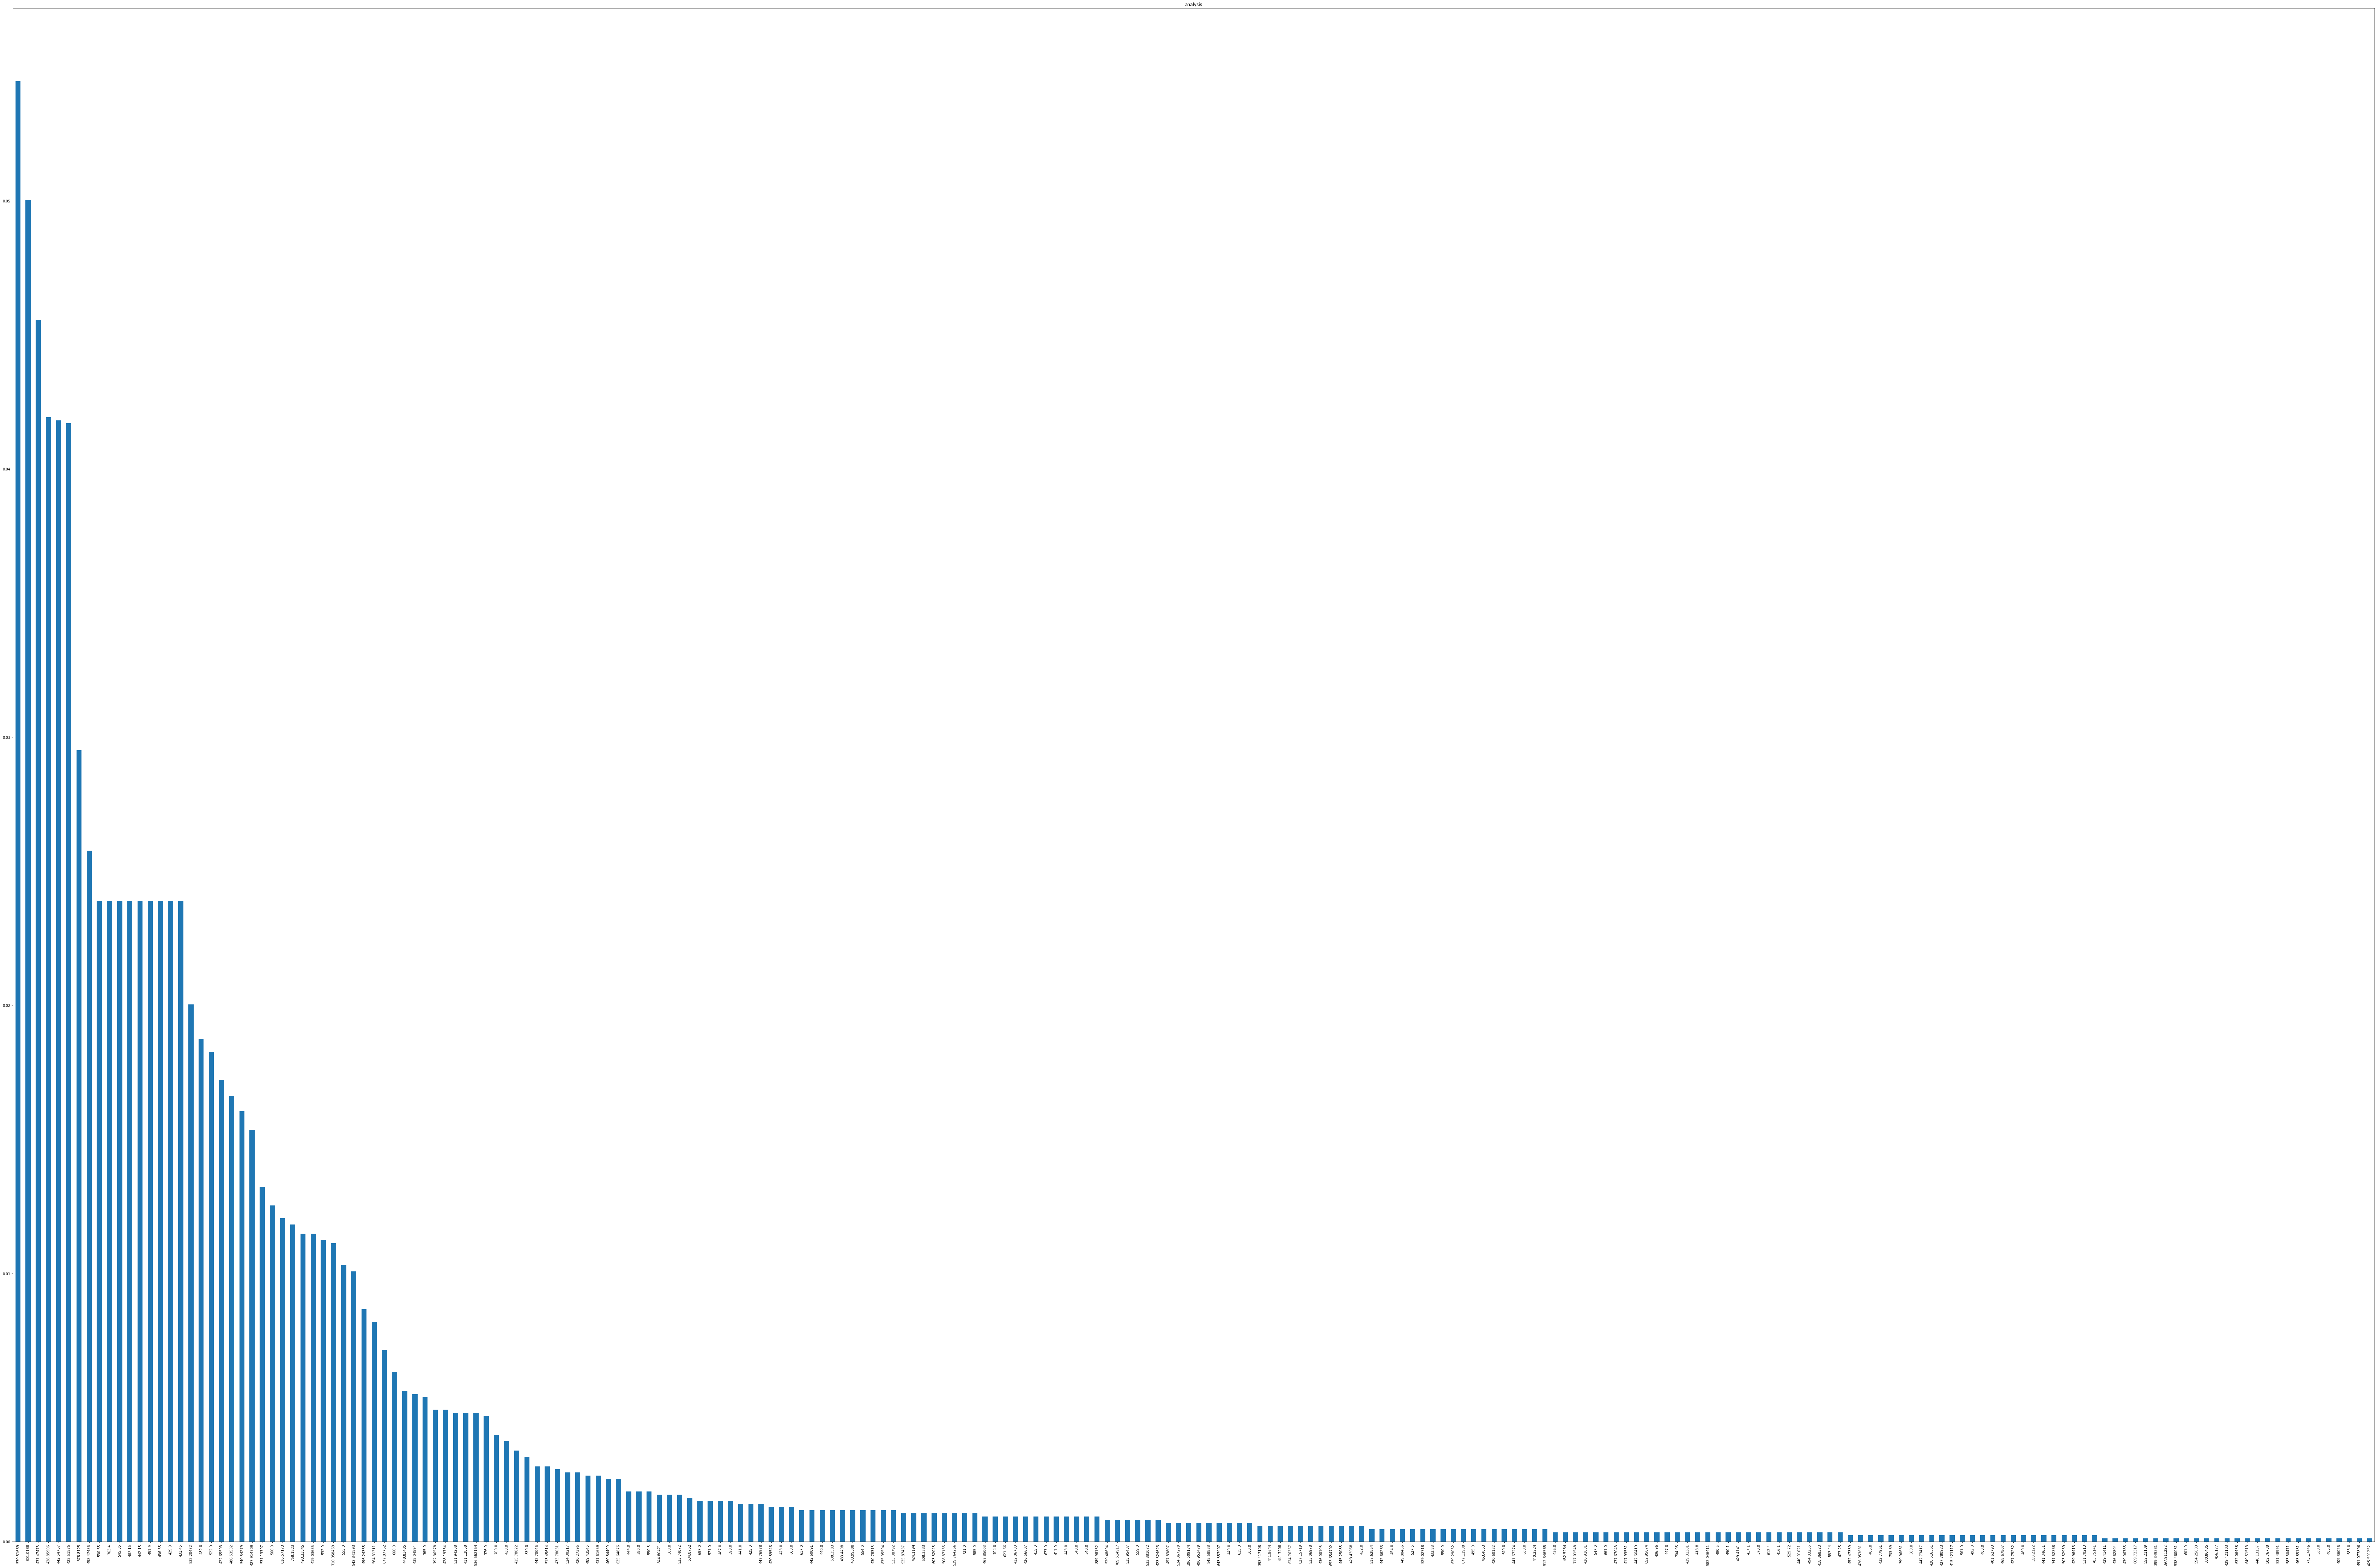

In [12]:
plt.figure(figsize=(120,80))
ax1 = clean_data['CO2 ppm'].value_counts(normalize=True).plot.bar(title='analysis')
plt.show()

In [13]:
clean_data['CO2 ppm'].fillna(clean_data['CO2 ppm'].mean(), inplace = True)

In [14]:
df[df.columns[df.isnull().any()]].isnull().sum()

Ref No                                                              8699
Site(location)                                                      6009
latitude                                                              37
longitude                                                             37
Current Average Temperature (dC)_area_weighted                        37
Current Average Temperature_point_coordinate (dC)                     37
Current Annual Precipitation (mm) _area_weighted                      37
Current Annual Precipitation  (mm) _point_coordinate                  37
Baseline_Mid-point                                                     1
Local delta T                                                       4311
Local delta T from 2005                                               37
Annual Precipitation change each study  (mm)                        5149
 Annual Precipitation change  from 2005 (mm)                          37
Projected yield (t/ha)                             

In [15]:
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Ref No                                                  8699
latitude                                                  37
longitude                                                 37
Current Average Temperature (dC)_area_weighted            37
Current Average Temperature_point_coordinate (dC)         37
Current Annual Precipitation (mm) _area_weighted          37
Current Annual Precipitation  (mm) _point_coordinate      37
Baseline_Mid-point                                         1
Local delta T from 2005                                   37
 Annual Precipitation change  from 2005 (mm)              37
Projected yield (t/ha)                                  5283
dtype: int64

In [16]:
clean_data = clean_data.dropna(subset=['latitude'])

In [17]:
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Ref No                    8662
Baseline_Mid-point           1
Projected yield (t/ha)    5246
dtype: int64

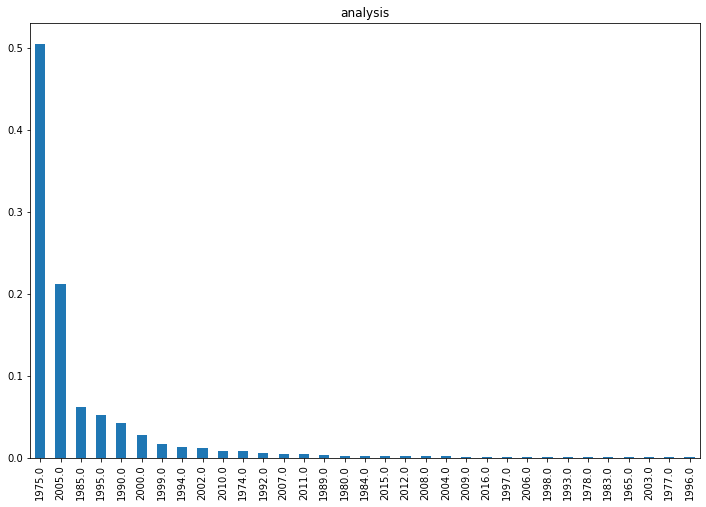

In [18]:
plt.figure(figsize=(12,8))
ax1 = clean_data['Baseline_Mid-point'].value_counts(normalize=True).plot.bar(title='analysis')
plt.show()

In [19]:
clean_data['Baseline_Mid-point'].fillna(clean_data['Baseline_Mid-point'].mode()[0], inplace = True)

In [20]:
clean_data[clean_data.columns[clean_data.isnull().any()]].isnull().sum()

Ref No                    8662
Projected yield (t/ha)    5246
dtype: int64

In [21]:
test_data = clean_data[clean_data['Projected yield (t/ha)'].isna()]

In [22]:
train_data = clean_data.dropna(subset=['Projected yield (t/ha)'])

In [23]:
train_data.shape,test_data.shape

((3420, 38), (5246, 38))

DATA IS CLEANED

In [24]:
train_data.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T from 2005,Annual Precipitation change from 2005 (mm),Global delta T from pre-industrial period,Global delta T from 2005,Projected yield (t/ha),Climate impacts (%),Climate impacts relative to 2005,Climate impacts per dC (%),Climate impacts per decade (%),CO2 ppm
count,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000,3420.000000
mean,4687.339181,25.676630,22.614370,17.264956,16.791998,959.962104,930.299054,2055.092105,1996.751462,1.699006,32.698388,2.260822,1.470822,4.353767,-15.140432,-14.625377,-11.880689,-3.554590,515.590028
std,2835.329013,23.266569,74.893768,6.875179,7.966570,560.104015,671.600860,20.264484,11.637057,0.975629,92.275423,0.778302,0.778302,2.646227,29.394006,28.053946,25.358315,7.227903,101.436047
min,1.000000,-38.416100,-122.000000,-3.846288,-8.371055,1.764165,1.764165,2015.000000,1974.000000,0.100962,-130.011200,0.870000,0.080000,0.000000,-100.000000,-100.000000,-158.227848,-40.777778,360.000000
25%,966.750000,14.058300,-51.925300,11.788200,10.606013,570.196723,421.181280,2035.000000,1990.000000,0.967000,-8.034400,1.728000,0.938000,2.166074,-28.685150,-24.837848,-17.248711,-5.540585,441.720800
50%,5380.500000,32.760000,31.165600,16.554688,16.520588,838.617235,805.450052,2050.000000,2005.000000,1.432746,12.782000,2.094000,1.304000,4.137600,-11.200000,-9.287932,-5.615714,-1.946773,487.150000
75%,7307.250000,40.463700,80.771800,23.473879,24.380180,1286.601796,1254.342238,2080.000000,2005.000000,2.104000,53.909661,2.593000,1.803000,6.481200,2.878338,2.418272,1.499915,0.487198,545.350000
max,8666.000000,61.924110,149.790000,29.747280,29.747280,3010.707349,3891.503190,2100.000000,2016.000000,5.550000,892.166667,5.350000,4.560000,13.820000,113.663879,89.714286,153.710247,26.153333,935.874370


#EDA

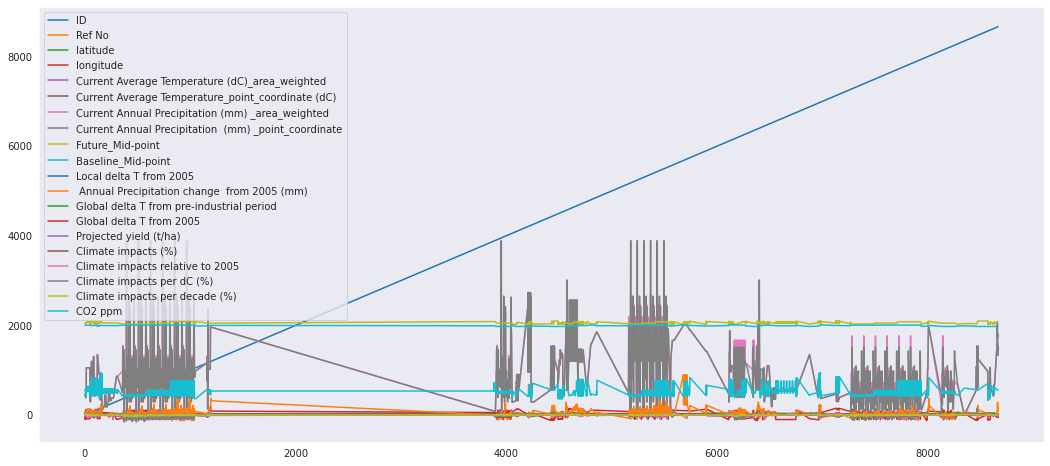

In [25]:
sns.set_style('dark')
train_data.plot(figsize=(18, 8))
plt.show()

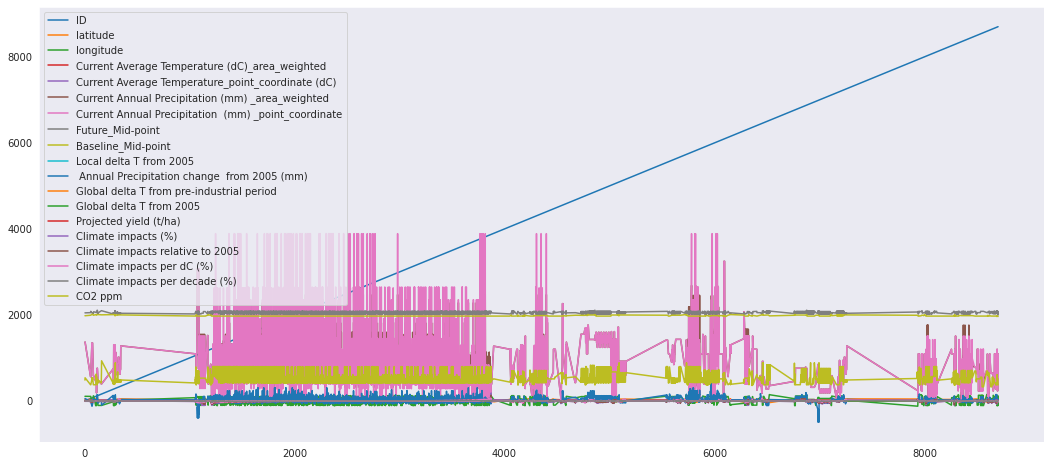

In [26]:
sns.set_style('dark')
test_data.plot(figsize=(18, 8))
plt.show()

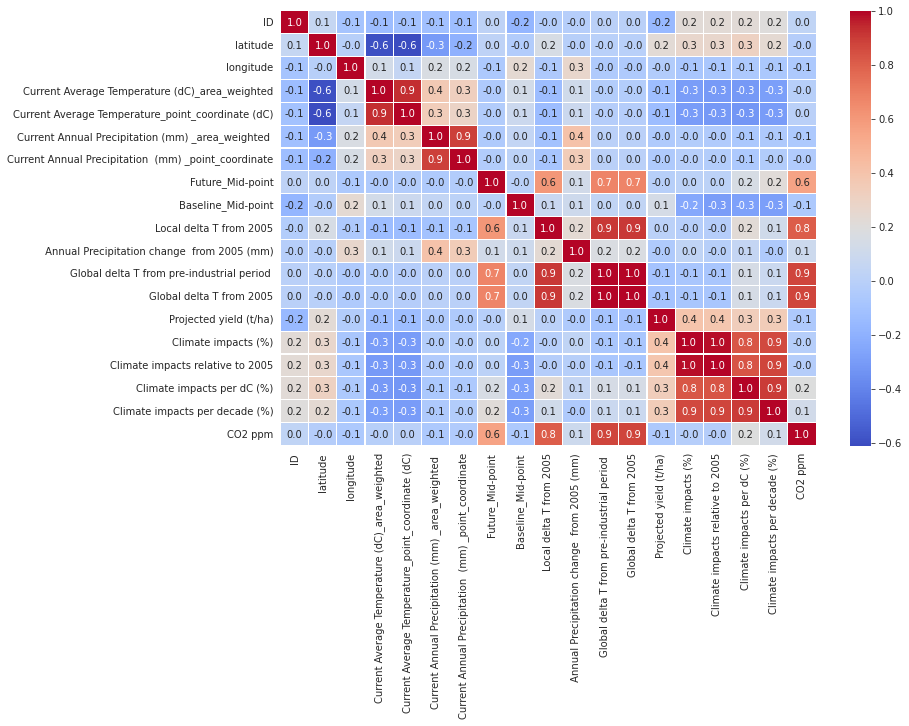

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [28]:
train_data.head()

,ID,Ref No,Methods,Scale,Crop,Country,Region,latitude,longitude,Current Average Temperature (dC)_area_weighted,...,CO2 ppm,Fertiliser,Irrigation,Cultivar,Soil organic matter management,Planting time,Tillage,Others,Adaptation,Adaptation type
0,1.0,NaN,SCOPUS-NewSearch,Regional,Maize,Pakistan,Asia,31.4167,73.0911,25.454252,...,564.31311,No,No,No,No,No,No,No,No,No
1,2.0,NaN,SCOPUS-NewSearch,Regional,Maize,Pakistan,Asia,31.4167,73.0911,25.454252,...,564.31311,Yes,No,Yes,No,Yes,No,Yes,Yes,Combined
2,3.0,NaN,SCOPUS-NewSearch,Regional,Maize,United States,North America,43.2705,-104.1080,10.191208,...,570.51669,No,No,No,No,No,No,No,No,No
3,4.0,NaN,SCOPUS-NewSearch,Regional,Maize,United States,North America,43.2705,-104.1080,10.191208,...,570.51669,No,No,No,No,No,No,Yes,Yes,Others
6,7.0,NaN,SCOPUS-NewSearch,Regional,Maize,China,Asia,37.4000,115.2000,14.786566,...,378.81250,No,No,No,No,No,No,No,No,No


In [29]:
train_data = train_data.replace({"Yes" : 1, "No" : 0})
test_data = test_data.replace({"Yes" : 1, "No" : 0,})

In [30]:
train_data['Adaptation type'] = train_data['Adaptation type'].replace({1 : 'Yes',0 : 'No'})
test_data['Adaptation type'] = test_data['Adaptation type'].replace({1 : 'Yes ',0 : 'No'})

In [31]:
train_data.shape,test_data.shape

((3420, 38), (5246, 38))

In [32]:
print(train_data["Adaptation type"].unique())
print(test_data["Adaptation type"].unique())

['No' 'Combined' 'Others' 'Planting date' 'Tillage' 'Fertiliser'
 'Cultivar' 'Soil organic matter management' 'Irrigation']
['No' 'Cultivar' 'Irrigation' 'Fertiliser' 'Combined' 'Others'
 'Planting date']


In [33]:
print(train_data["Projected yield (t/ha)"].dtype)

float64


In [34]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Scale','Crop', 'Country','Region',' Methods','Time slice','Climate scenario','Scenario source','Adaptation type']
le = LabelEncoder()
for col in feature_col:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])

In [35]:
train_data.info(),train_data.describe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 0 to 8665
Data columns (total 38 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    3420 non-null   float64
 1   Ref No                                                0 non-null      float64
 2    Methods                                              3420 non-null   int64  
 3   Scale                                                 3420 non-null   int64  
 4   Crop                                                  3420 non-null   int64  
 5   Country                                               3420 non-null   int64  
 6   Region                                                3420 non-null   int64  
 7   latitude                                              3420 non-null   float64
 8   longitude                                             3420

(None,
 <bound method NDFrame.describe of           ID  Ref No    Methods  Scale  Crop  Country  Region  latitude  \
 0        1.0      NaN         1      1     0       48       1   31.4167   
 1        2.0      NaN         1      1     0       48       1   31.4167   
 2        3.0      NaN         1      1     0       72       5   43.2705   
 3        4.0      NaN         1      1     0       72       5   43.2705   
 6        7.0      NaN         1      1     0       13       1   37.4000   
 ...      ...      ...       ...    ...   ...      ...     ...       ...   
 8661  8662.0      NaN         0      2     3        7       3  -25.0600   
 8662  8663.0      NaN         0      2     3        7       3  -23.1900   
 8663  8664.0      NaN         0      2     3        7       3  -22.5300   
 8664  8665.0      NaN         0      2     3        7       3  -20.2700   
 8665  8666.0      NaN         0      2     3        7       3  -19.2800   
 
       longitude  Current Average Temperature

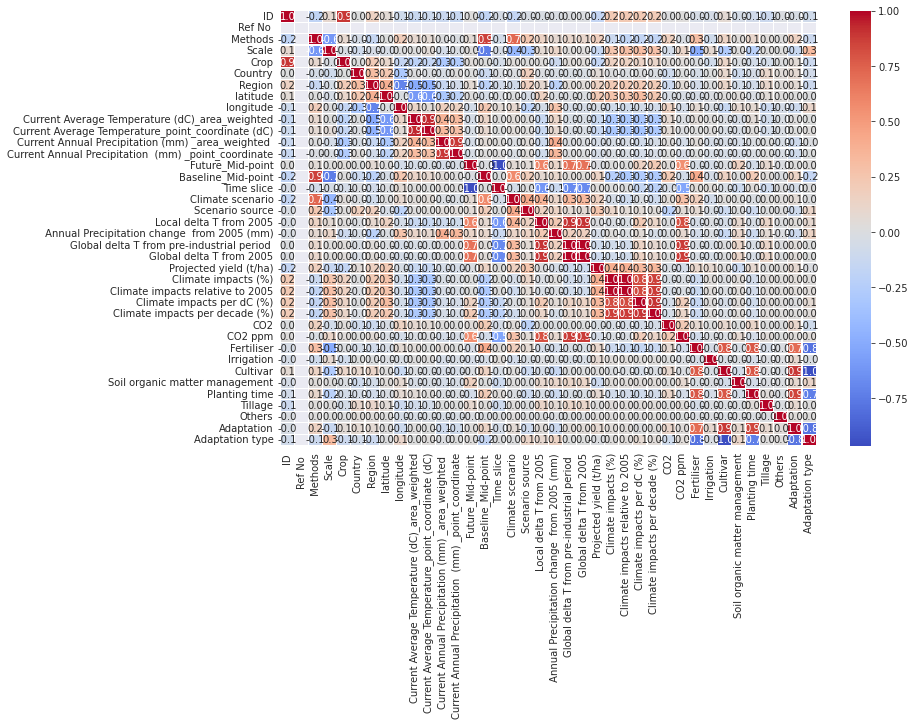

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [37]:
train_data.drop(['ID','Ref No '],axis = 1,inplace = True)
test_data.drop(['ID','Ref No '],axis = 1,inplace = True)

In [38]:
X = train_data.drop(columns=['Projected yield (t/ha)'], axis=1)
X_valid = test_data.drop(columns=['Projected yield (t/ha)'], axis=1)
y = train_data['Projected yield (t/ha)']

In [39]:
X.shape,X_valid.shape,y.shape

((3420, 35), (5246, 35), (3420,))

In [40]:
y = np.expand_dims(y, axis=1)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
X_valid = sc_X.fit_transform(X_valid)
y = sc_y.fit_transform(y)

In [42]:
from sklearn .model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3)

In [43]:
from sklearn.svm import SVR
regressor= SVR()
regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [44]:
X_train.shape,y_train.shape

((2394, 35), (2394, 1))

In [45]:
X.shape,X_valid.shape,y.shape

((3420, 35), (5246, 35), (3420, 1))

## Linear Regressor

In [46]:
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred)

print(f"r2_score %: {r2_score(y_test,y_pred)}")
lr_results = r2_score(y_test,y_pred)
print(sc_y.inverse_transform(y_pred))

r2_score %: 0.3837441613126278
[[1.72964478]
 [6.89156709]
 [2.48264334]
 ...
 [4.94838816]
 [3.92739923]
 [3.43437957]]


In [47]:
y_valid_lr = regressor.predict(X_valid)
print(f'This is X_valid: {X_valid, X_valid.shape}')
print(f'This is y_valid: {y_valid_lr, y_valid_lr.shape}')
yield_per_hectare = sc_y.inverse_transform(y_valid_lr)
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))
This is y_valid: (array([[ 0.43882109],
       [ 0.48634815],
       [ 0.40694584],
       ...,
       [-0.70185808],
       [-0.57888305],
       [-0.11322475]]), (5246, 1))
This is yield_per_hectare: [[5.51481785]
 [5.64056684]
 [5.43048104]
 ...
 [2.49676329]
 [2.82213555]
 [4.0541929 ]]


## Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *
rf_regressor = RandomForestRegressor(n_estimators = 100,
                                      random_state =42)
rf_regressor.fit(X_train,y_train)
y_predrf = rf_regressor.predict(X_test)
# y_predrf = sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1))

print(f"r2_score: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1)))}")
rf_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1)))
print(sc_y.inverse_transform(np.expand_dims(y_predrf, axis=1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


r2_score: 0.9257991181578337
[[0.9657469 ]
 [5.47919444]
 [5.01641765]
 ...
 [5.8619894 ]
 [4.16872357]
 [1.89922134]]


In [67]:
y_valid_rf = rf_regressor.predict(X_valid)
yield_per_hectare = sc_y.inverse_transform((np.expand_dims(y_valid_rf, axis=1)))
print(f'This is X_valid: {X_valid, X_valid.shape}')
print(f'This is y_valid: {y_valid_rf, y_valid_rf.shape}')
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))
This is y_valid: (array([ 0.16624675,  0.15988921,  0.11493311, ..., -0.29311887,
       -0.83105044, -0.33481229]), (5246,))
This is yield_per_hectare: [[4.79362977]
 [4.77680873]
 [4.65786208]
 ...
 [3.57822183]
 [2.15494098]
 [3.46790772]]


##Decision Tree

In [70]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train,y_train)
y_preddt = dt_regressor.predict(X_test)
# y_preddf = sc_y.inverse_transform(np.expand_dims(y_preddf, axis=1))

print(f"r2_score: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_preddt, axis=1)))}")
dt_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(np.expand_dims(y_preddt, axis=1)))
print(sc_y.inverse_transform(np.expand_dims(y_preddt, axis=1)))

r2_score: 0.8407434812862862
[[1.09921753]
 [6.01      ]
 [6.355     ]
 ...
 [6.1757    ]
 [4.2665    ]
 [1.7788    ]]


In [71]:
y_valid_dt = dt_regressor.predict(X_valid)
yield_per_hectare = sc_y.inverse_transform((np.expand_dims(y_valid_dt, axis=1)))
print(f'This is X_valid: {X_valid, X_valid.shape}')
print(f'This is y_valid: {y_valid_dt, y_valid_dt.shape}')
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))
This is y_valid: (array([ 0.336465  ,  0.34300356, -1.11452979, ...,  1.02335461,
       -0.04560649, -0.78624085]), (5246,))
This is yield_per_hectare: [[5.244 ]
 [5.2613]
 [1.4049]
 ...
 [7.0614]
 [4.2331]
 [2.2735]]


## USING ENCODER

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [53]:
# AutoEncoder Model Preparation
n_inputs = X.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level 1
encoder= Dense(n_inputs*2)(input_data_shape)
encoder = BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# encoder level 2
encoder= Dense(n_inputs)(encoder)
encoder= BatchNormalization()(encoder)
encoder= LeakyReLU()(encoder)
# bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder, level 1
decoder = Dense(n_inputs)(bottleneck)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)
# decoder level 2
decoder = Dense(n_inputs*2)(decoder)
decoder = BatchNormalization()(decoder)
decoder = LeakyReLU()(decoder)

In [54]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [55]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=2, validation_data=(X_test,y_test))

Epoch 1/50
150/150 - 3s - loss: 0.8379 - val_loss: 0.6129 - 3s/epoch - 18ms/step
Epoch 2/50
150/150 - 1s - loss: 0.6022 - val_loss: 0.5364 - 747ms/epoch - 5ms/step
Epoch 3/50
150/150 - 1s - loss: 0.5435 - val_loss: 0.4835 - 735ms/epoch - 5ms/step
Epoch 4/50
150/150 - 1s - loss: 0.5274 - val_loss: 0.5081 - 755ms/epoch - 5ms/step
Epoch 5/50
150/150 - 1s - loss: 0.4761 - val_loss: 0.4463 - 770ms/epoch - 5ms/step
Epoch 6/50
150/150 - 1s - loss: 0.4417 - val_loss: 0.4360 - 739ms/epoch - 5ms/step
Epoch 7/50
150/150 - 1s - loss: 0.4539 - val_loss: 0.4135 - 785ms/epoch - 5ms/step
Epoch 8/50
150/150 - 1s - loss: 0.4323 - val_loss: 0.3784 - 760ms/epoch - 5ms/step
Epoch 9/50
150/150 - 1s - loss: 0.4222 - val_loss: 0.3659 - 769ms/epoch - 5ms/step
Epoch 10/50
150/150 - 1s - loss: 0.3928 - val_loss: 0.3935 - 757ms/epoch - 5ms/step
Epoch 11/50
150/150 - 1s - loss: 0.3959 - val_loss: 0.3559 - 773ms/epoch - 5ms/step
Epoch 12/50
150/150 - 1s - loss: 0.3896 - val_loss: 0.4039 - 753ms/epoch - 5ms/step
Epo

In [56]:
encoder = load_model('encoder.h5')

# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)
# encode the valid data
X_valid_encode = encoder.predict(X_valid)

In [57]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=100, input_dim=18, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=50, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=25, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['MeanAbsoluteError'])
 
# Fitting the ANN to the Training set
model.fit(X_train_encode, y_train , epochs = 100, verbose=1)

Epoch 1/100
75/75 [==============================] - 1s 3ms/step - loss: 0.8088 - mean_absolute_error: 0.7405
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3544 - mean_absolute_error: 0.4498
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.2099 - mean_absolute_error: 0.3476
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1577 - mean_absolute_error: 0.2983
Epoch 5/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1348 - mean_absolute_error: 0.2708
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1207 - mean_absolute_error: 0.2554
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1129 - mean_absolute_error: 0.2485
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1052 - mean_absolute_error: 0.2409
Epoch 9/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1023 - mean_absolute_error: 0.2334
Epoch 10/1

In [58]:
y_predann=model.predict(X_test_encode)
print(f"Error: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predann))}")
ann_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predann))
print(sc_y.inverse_transform(y_predann))

Error: 0.9357873584699832
[[0.7176371]
 [6.335722 ]
 [6.6814103]
 ...
 [5.500721 ]
 [4.3606787]
 [1.8668405]]


In [59]:
y_valid_ann = model.predict(X_valid_encode)
print(f'This is X_valid: {X_valid, X_valid.shape}')
print(f'This is y_valid: {y_valid_ann, y_valid_ann.shape}')
yield_per_hectare = sc_y.inverse_transform(y_valid_ann)
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))
This is y_valid: (array([[-0.05256142],
       [-0.11353961],
       [ 1.1579915 ],
       ...,
       [-1.281512  ],
       [-0.9629509 ],
       [ 0.13815022]], dtype=float32), (5246, 1))
This is yield_per_hectare: [[4.2146983]
 [4.05336  ]
 [7.417628 ]
 ...
 [0.9630917]
 [1.8059536]
 [4.7192907]]


## Normal ANN

In [60]:
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=1024, input_dim=35, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=512, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=256, kernel_initializer='normal', activation='tanh'))
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=32, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=16, kernel_initializer='normal', activation='relu'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='Adam',metrics=['mean_absolute_error'])
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train, epochs = 100, verbose=1)

Epoch 1/100
75/75 [==============================] - 1s 3ms/step - loss: 0.7287 - mean_absolute_error: 0.6912
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4484 - mean_absolute_error: 0.5076
Epoch 3/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3436 - mean_absolute_error: 0.4487
Epoch 4/100
75/75 [==============================] - 0s 3ms/step - loss: 0.2605 - mean_absolute_error: 0.3841
Epoch 5/100
75/75 [==============================] - 0s 4ms/step - loss: 0.2085 - mean_absolute_error: 0.3372
Epoch 6/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1687 - mean_absolute_error: 0.3045
Epoch 7/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1482 - mean_absolute_error: 0.2799
Epoch 8/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1209 - mean_absolute_error: 0.2512
Epoch 9/100
75/75 [==============================] - 0s 3ms/step - loss: 0.1160 - mean_absolute_error: 0.2471
Epoch 10/1

In [61]:
y_predNN=model.predict(X_test)


print(f"Error: {r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predNN))}")
NN_results = r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_predNN))
print(sc_y.inverse_transform(y_predNN))

Error: 0.9317877212211115
[[0.88849145]
 [6.282415  ]
 [7.314629  ]
 ...
 [5.315318  ]
 [4.365118  ]
 [1.8358282 ]]


In [62]:
sc_y.inverse_transform(y_test[5:])

array([[2.4169    ],
       [0.77381736],
       [7.45042094],
       ...,
       [5.2493    ],
       [4.3305    ],
       [1.9141    ]])

In [63]:
tf.convert_to_tensor(X_valid)

<tf.Tensor: shape=(5246, 35), dtype=float64, numpy=
array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]])>

In [64]:
y_valid = model.predict(X_valid)
print(f'This is X_valid: {X_valid, X_valid.shape}')
print(f'This is y_valid: {y_valid, y_valid.shape}')
yield_per_hectare = sc_y.inverse_transform(y_valid)
print(f'This is yield_per_hectare: {yield_per_hectare}')

This is X_valid: (array([[ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [ 1.80406857,  0.56200492, -0.67396115, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       ...,
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  1.80234056,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244],
       [-0.55430265,  0.56200492,  1.88868698, ..., -0.2374519 ,
        -1.64701794,  1.00967244]]), (5246, 35))
This is y_valid: (array([[ 0.06935707],
       [ 0.08135214],
       [ 0.67388064],
       ...,
       [-0.7339754 ],
       [-0.6311459 ],
       [-1.0611752 ]], dtype=float32), (5246, 1))
This is yield_per_hectare: [[4.5372753]
 [4.569012 ]
 [6.136748 ]
 ...
 [2.411786 ]
 [2.6838565]
 [1.5460676]]


In [72]:
# creating the dataset
data = {'Logistic Regression':round(lr_results,2),
        'Random Forest Classification':round(rf_results,2),
        'Decision Tree':round(dt_results,2),
        'ANN using encoders':round(ann_results,2),
        'ANN without encoders':round(NN_results,2)}
Algo = list(data.keys())
values = list(data.values())

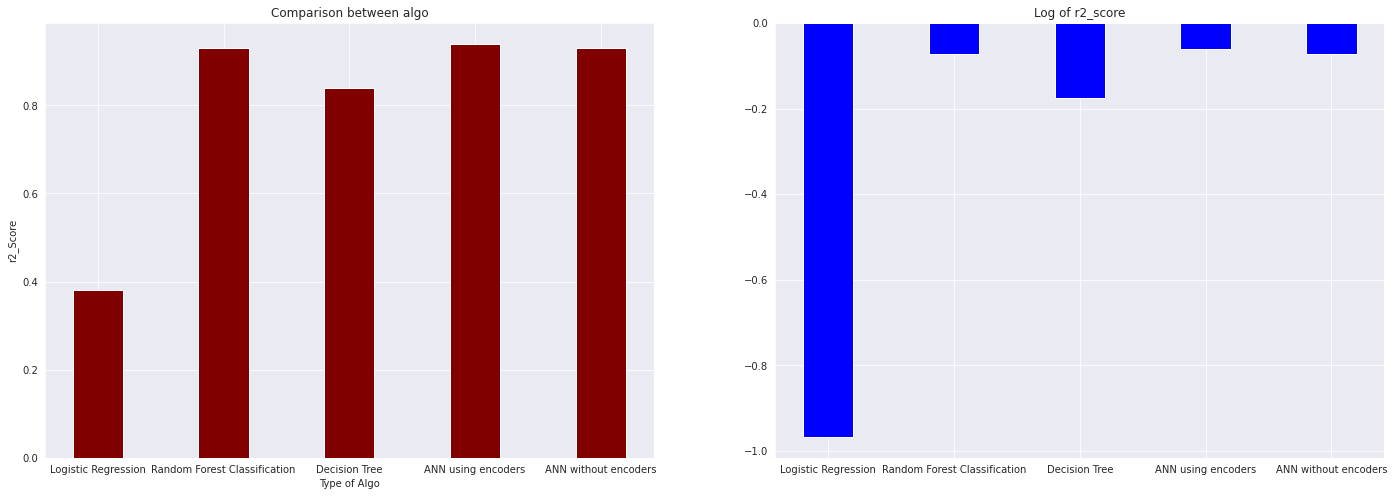

In [73]:
plt.figure(figsize=(24, 8))
plt.subplot(1, 2, 1)

plt.grid()
plt.bar(Algo, values, color ='maroon',
        width = 0.4) 
plt.xlabel("Type of Algo")
plt.ylabel("r2_Score")
plt.title("Comparison between algo")

plt.subplot(1, 2, 2)
plt.grid()
plt.bar(Algo, np.log(values), color ='blue',
        width = 0.4)
plt.title("Log of r2_score")

plt.show()
